Python Version: 3.12.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
# git clone https://github.com/phipyao/ds4002-project-2
# filepath: /content/ds4002-project-2

Cloning into 'ds4002-project-2'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 43 (delta 13), reused 24 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 421.65 KiB | 8.11 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
df1=pd.read_csv('../DATA/cville_monthly_precip_total.csv')
df1.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,2.35,1.69,2.54,3.80,2.78,7.72,2.98,3.23,4.92,0.01,1.8,2.91,36.73
1,2001,1.92,1.01,4.34,0.95,2.94,5.29,3.38,1.26,2.76,1.49,0.78,2.14,28.26
2,2002,1.43,0.67,3.54,4.37,1.56,2.63,4.39,2.00,3.42,5.17,4.82,3.92,37.92
3,2003,2.62,7.29,4.81,4.61,7.03,6.16,6.90,6.13,10.41,3.32,4.89,4.51,68.68
4,2004,1.56,2.25,1.55,4.31,5.46,5.19,4.38,1.82,8.89,0.87,4.82,2.74,43.84


In [ ]:
df2=pd.read_csv('../DATA/cville_monthly_mean_temp.csv')
df2.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,34.0,42.2,49.5,54.4,65.4,72.7,71.7,72.6,65.3,58,43.4,29.7,54.9
1,2001,35.2,40.1,43.0,56.8,62.2,71.6,71.5,75.5,64.9,55.3,52.1,42.7,55.9
2,2002,41.6,40.8,46.5,57.6,61.9,73.6,76.7,76.2,68.9,55.7,45,36.1,56.7
3,2003,31.0,34.1,47.7,55.2,61.0,69.0,74.9,75.7,66.3,55,51.2,37.1,54.9
4,2004,32.1,36.8,48.2,56.4,69.1,71.1,74.9,72.0,68.0,56.6,49,39.1,56.1


In [4]:
df3 = pd.read_csv("../DATA/cville monthly precip total v2.csv")
df3.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1893,M,M,M,3.54,M,M,M,M,M,M,M,M,M
1,1894,M,M,M,M,M,M,M,M,M,M,M,M,M
2,1895,M,M,M,M,M,M,M,M,M,M,M,M,M
3,1896,M,M,M,M,M,M,M,M,M,0.25,M,T,M
4,1897,M,M,M,M,M,M,M,M,M,M,M,M,M


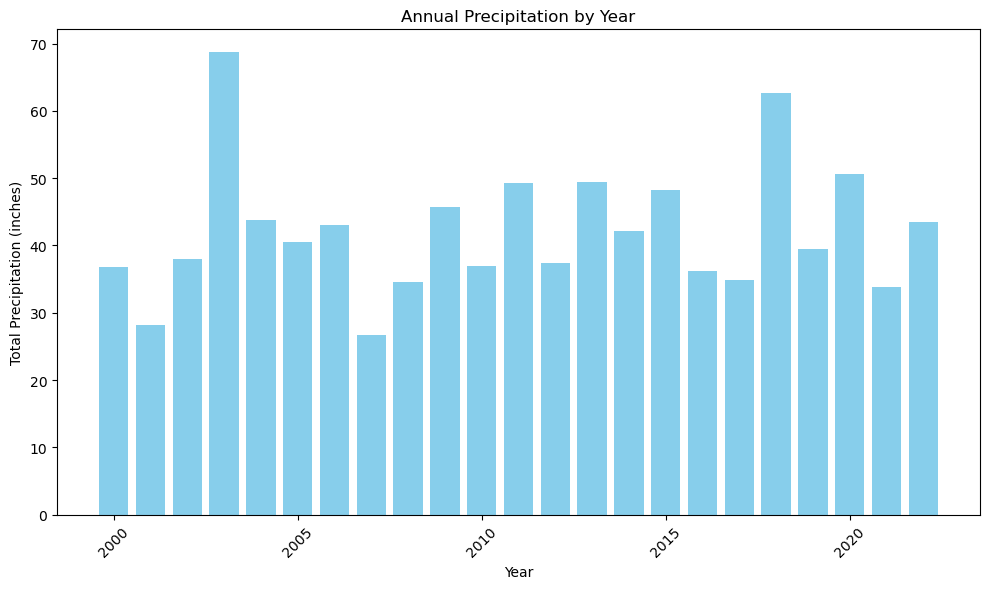

In [ ]:
# Set the style for plots
plt.style.use('default')

# Convert 'Annual' to numeric for analysis data
df1['Annual'] = pd.to_numeric(df1['Annual'], errors='coerce')

# Create a bar chart for Annual Precipitation by Year
plt.figure(figsize=(10, 6))
plt.bar(df1['Year'], df1['Annual'], color='skyblue')
plt.title('Annual Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


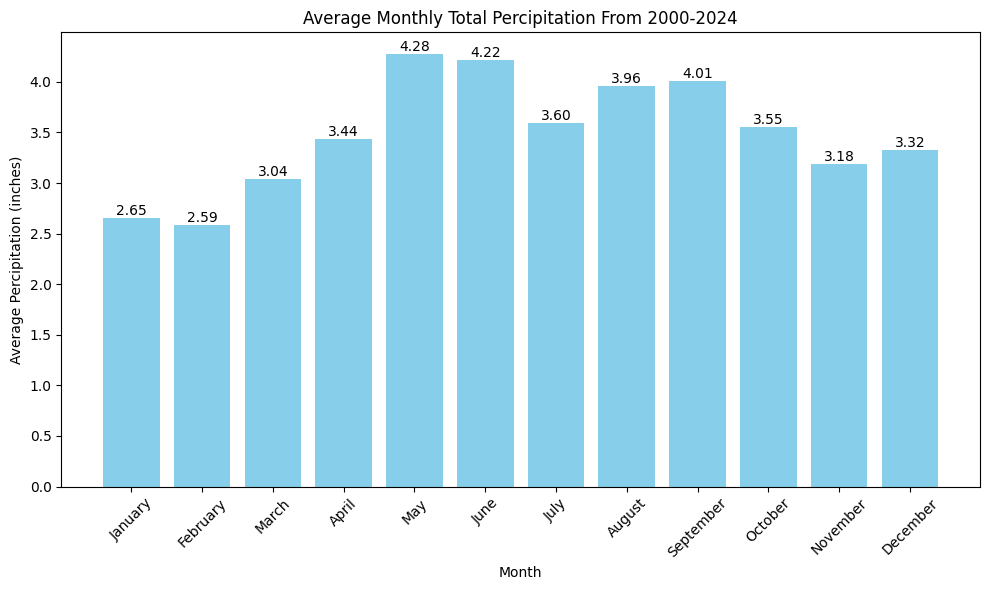

In [ ]:
df1.replace('M', pd.NA, inplace=True)

# Drop annual percipitation
if 'Annual' in df1.columns:
    df1 = df1.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df1.columns[1:]:  # Skip the 'Year' column
    df1[month] = pd.to_numeric(df1[month], errors='coerce')

# Calculate the average total percipitation for each month
monthly_avg = df1.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Percipitation (inches)')
plt.title('Average Monthly Total Percipitation From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

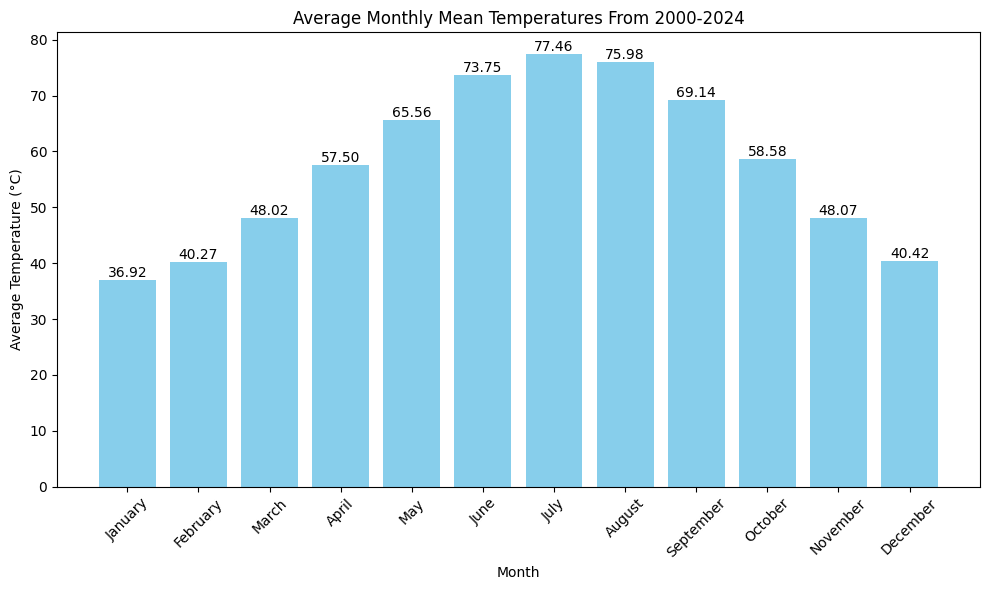

In [ ]:
df2.replace('M', pd.NA, inplace=True)

# Drop annual temperature
if 'Annual' in df2.columns:
    df2 = df2.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df2.columns[1:]:  # Skip the 'Year' column
    df2[month] = pd.to_numeric(df2[month], errors='coerce')

# Calculate the average mean temperature for each month
monthly_avg = df2.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Mean Temperatures From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



   Year January February March April   May  June  July August September  \
0  1893    <NA>     <NA>  <NA>  3.54  <NA>  <NA>  <NA>   <NA>      <NA>   
1  1894    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
2  1895    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
3  1896    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
4  1897    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   

  October November December Annual  
0    <NA>     <NA>     <NA>   <NA>  
1    <NA>     <NA>     <NA>   <NA>  
2    <NA>     <NA>     <NA>   <NA>  
3    0.25     <NA>        T   <NA>  
4    <NA>     <NA>     <NA>   <NA>  


<ipython-input-6-343b4088df59>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


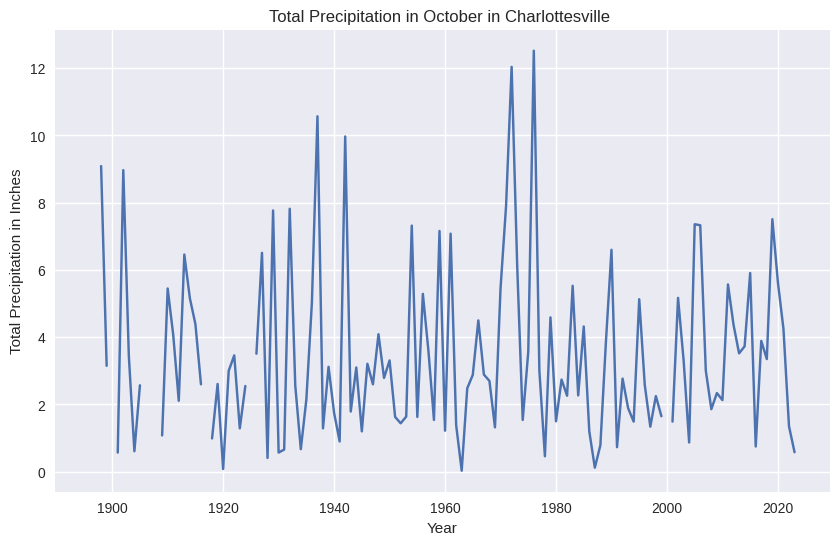

In [6]:
# Replacing "M" values with null values
df3.replace('M', pd.NA, inplace=True)

print(df3.head())
# Drop annual percipitation
if 'Annual' in df3.columns:
    df3 = df3.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df3.columns[1:]:  # Skip the 'Year' column
    df3[month] = pd.to_numeric(df3[month], errors='coerce')

df3.head()
#df3['Year'] = pd.DatetimeIndex.year(df3['Year'])
#df3.set_index('Year', inplace=True)

plt.style.use("seaborn")

# Plotting time series
plt.figure(figsize=(10,6))


plt.plot(df3['Year'], df3['October'])
plt.title('Total Precipitation in October in Charlottesville ')
plt.ylabel('Total Precipitation in Inches')
plt.xlabel('Year')
plt.show()



<ipython-input-7-c5ff79eabc36>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_missing.fillna(method='ffill')


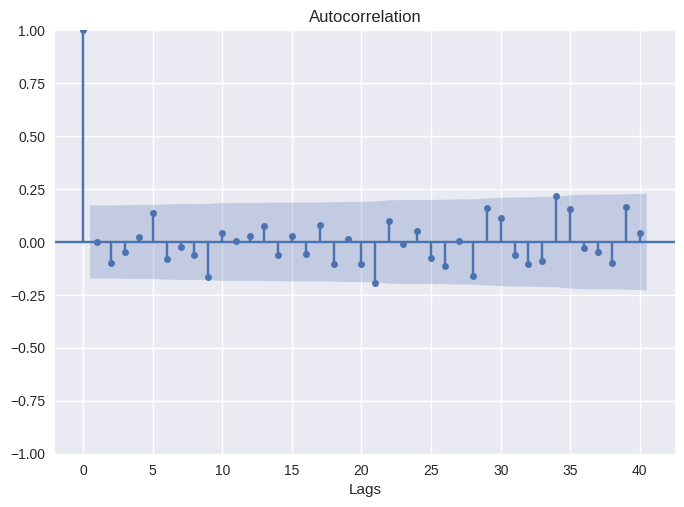

In [7]:
data_missing = df3.copy()

# Imputing missing values using forward fill method
data_filled = data_missing.fillna(method='ffill')

# ACF plot of October precipitation
october_precip = data_filled['October'].dropna().squeeze()
plot_acf(october_precip, lags=40, alpha=0.05)
plt.xlabel("Lags")
plt.show()